In [1]:
import os
import numpy as np
import scipy.io
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv1D, Flatten, Dense
from tensorflow.keras.models import Sequential

data_dir = "/home/saher/Documents/data_preprocessed_matlab"
file_names = [f"s{i:02d}.mat" for i in range(1, 33)] 

X_data = []
y_clip = []

for participant_id, file_name in enumerate(file_names, start=1):
    file_path = os.path.join(data_dir, file_name)
    mat = scipy.io.loadmat(file_path)
    
    eeg_data = mat['data'] 
    
    for clip_id in range(40):
        clip_data = eeg_data[clip_id, :32, 384:]  
        
        for second in range(60):
            start_idx = second * 128
            end_idx = (second + 1) * 128
            second_data = clip_data[:, start_idx:end_idx]
            
            X_data.append(second_data)
            y_clip.append(clip_id) 

X_data = np.array(X_data)
y_clip = np.array(y_clip)

clip_encoder = LabelEncoder()
y_clip_encoded = clip_encoder.fit_transform(y_clip)

y_clip_onehot = tf.keras.utils.to_categorical(y_clip_encoded, num_classes=len(clip_encoder.classes_))

scaler = StandardScaler()
X_data = X_data.reshape(-1, 32 * 128)  
X_data = scaler.fit_transform(X_data)
X_data = X_data.reshape(-1, 32, 128)  

X_train, X_test, y_train, y_test = train_test_split(X_data, y_clip_onehot, test_size=0.2, random_state=42)

def create_cnn_clip_model():
    model = Sequential()    
    # Simple 1D CNN layer
    model.add(Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(32, 128)))
    # model.add(MaxPooling1D(pool_size=2))
    
    # Flatten and output layer
    model.add(Flatten())
    model.add(Dense(len(clip_encoder.classes_), activation='softmax'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Instantiate and train the model
cnn_clip_model = create_cnn_clip_model()

history_clip = cnn_clip_model.fit(X_train, y_train, 
                             validation_data=(X_test, y_test),
                             epochs=100, batch_size=32, verbose=1)

# Evaluate the model
scores = cnn_clip_model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {scores[1]*100:.2f}%")

# # Plot training and validation accuracy
# plt.figure(figsize=(10, 5))
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.title('Clip Prediction Accuracy over Epochs')
# plt.legend()
# plt.grid(True)
# plt.show()



2024-09-10 21:32:30.164242: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-10 21:32:30.165081: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-10 21:32:30.167561: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-10 21:32:30.174977: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-10 21:32:30.189438: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registe

Epoch 1/100
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0269 - loss: 3.8805 - val_accuracy: 0.0283 - val_loss: 3.7268
Epoch 2/100
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0369 - loss: 3.6878 - val_accuracy: 0.0327 - val_loss: 3.7207
Epoch 3/100
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0451 - loss: 3.6576 - val_accuracy: 0.0408 - val_loss: 3.7070
Epoch 4/100
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.0588 - loss: 3.6034 - val_accuracy: 0.0511 - val_loss: 3.6728
Epoch 5/100
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0736 - loss: 3.5311 - val_accuracy: 0.0584 - val_loss: 3.6092
Epoch 6/100
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0882 - loss: 3.4348 - val_accuracy: 0.0657 - val_loss: 3.5445
Epoch 7/100
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0991 - loss: 3.3563 - val_accuracy: 0.0714 - val_loss: 3.5094
Epoch 8/100
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1100 - loss: 3

/home/saher/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6598 - loss: 1.5425 - val_accuracy: 0.9855 - val_loss: 0.0985
Epoch 2/100
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9907 - loss: 0.0630 - val_accuracy: 0.9934 - val_loss: 0.0392
Epoch 3/100
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9973 - loss: 0.0193 - val_accuracy: 0.9936 - val_loss: 0.0276
Epoch 4/100
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9993 - loss: 0.0076 - val_accuracy: 0.9952 - val_loss: 0.0210
Epoch 5/100
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9998 - loss: 0.0031 - val_accuracy: 0.9960 - val_loss: 0.0194
Epoch 6/100
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9999 - loss: 0.0018 - val_accuracy: 0.9950 - val_loss: 0.0226
Epoch 7/100
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9998 - loss: 0.0020 - val_accuracy: 0.9959 - val_loss: 0.0197
Epoch 8/100
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 1.0000 - loss: 5

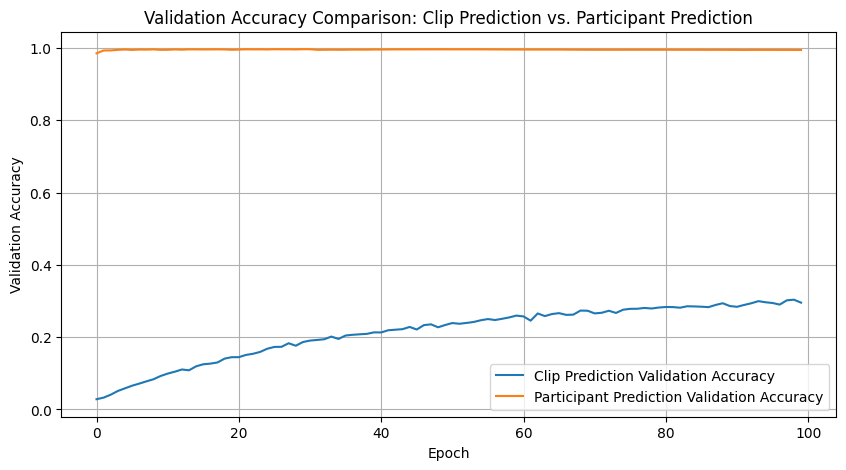

In [2]:
X_data = []
y_participant = []

for participant_id, file_name in enumerate(file_names, start=1):
    file_path = os.path.join(data_dir, file_name)
    mat = scipy.io.loadmat(file_path)
    
    eeg_data = mat['data'] 
    
    for clip_id in range(40):
        clip_data = eeg_data[clip_id, :32, 384:]  
        
        for second in range(60):
            start_idx = second * 128
            end_idx = (second + 1) * 128
            second_data = clip_data[:, start_idx:end_idx]
            
            X_data.append(second_data)
            y_participant.append(participant_id - 1)  

X_data = np.array(X_data)
y_participant = np.array(y_participant)

participant_encoder = LabelEncoder()
y_participant_encoded = participant_encoder.fit_transform(y_participant)

y_participant_onehot = tf.keras.utils.to_categorical(y_participant_encoded, num_classes=len(participant_encoder.classes_))

scaler = StandardScaler()
X_data = X_data.reshape(-1, 32 * 128)  
X_data = scaler.fit_transform(X_data)
X_data = X_data.reshape(-1, 32, 128)  

X_train, X_test, y_train, y_test = train_test_split(X_data, y_participant_onehot, test_size=0.2, random_state=42)

def create_participant_model():

    model = Sequential()    
    model.add(Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(32, 128)))
        
    model.add(Flatten())
    model.add(Dense(len(participant_encoder.classes_), activation='softmax'))
        
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        
    return model

model = create_participant_model()
history_participant = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

scores = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {scores[1] * 100:.2f}%")

plt.figure(figsize=(10, 5))
plt.plot(history_clip.history['val_accuracy'], label='Clip Prediction Validation Accuracy')
plt.plot(history_participant.history['val_accuracy'], label='Participant Prediction Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Comparison: Clip Prediction vs. Participant Prediction')
plt.legend()
plt.grid(True)
plt.show()
